<a href="https://colab.research.google.com/github/kenyarodriguezmor/Estadistica2025B/blob/main/Proyecto_UNIDAD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
url = "https://raw.githubusercontent.com/kenyarodriguezmor/Estadistica2025B/main/Student_Performance_new.csv"

df= pd.read_csv(url)
df


,Unnamed: 0,etnia,nivel_educativo_de_los_padres,tipo_de_comida,curso_de_preparación_para_el_examen,porcentaje_de_matematicas,porcentaje_de_lectura,porcentaje_de_escritura,sexo
0,0,group_B,licenciatura,estandar,nada,0.72,0.72,0.74,mujer
1,1,group_C,algo_de_universidad,estandar,completado,0.69,0.90,0.88,mujer
2,2,group_B,maestria,estandar,nada,0.90,0.95,0.93,mujer
3,3,group_A,tecnico_asociado,subsidiado,nada,0.47,0.57,0.44,hombre
4,4,group_C,algo_de_universidad,estandar,nada,0.76,0.78,0.75,hombre
...,...,...,...,...,...,...,...,...,...
995,995,group_E,maestria,estandar,completado,0.88,0.99,0.95,mujer
996,996,group_C,preparatoria,subsidiado,nada,0.62,0.55,0.55,hombre
997,997,group_C,preparatoria,subsidiado,completado,0.59,0.71,0.65,mujer
998,998,group_D,algo_de_universidad,estandar,completado,0.68,0.78,0.77,mujer


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, boxcox
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def analizar_categoria(df, categoria, respuesta):

    print(f"\n===========================")
    print(f" ANÁLISIS PARA: {categoria}")
    print(f"===========================\n")

    # ANOVA
    modelo = ols(f'{respuesta} ~ C({categoria})', data=df).fit()
    print("\nANOVA:")
    print(sm.stats.anova_lm(modelo, typ=2))

    # Normalidad
    residuos = modelo.resid
    print("\nPrueba Shapiro-Wilk:")
    print(shapiro(residuos))

    sm.qqplot(residuos, line='s')
    plt.title(f"QQ-Plot de residuos ({categoria})")
    plt.show()

    sns.histplot(residuos, kde=True)
    plt.title(f"Histograma de residuos ({categoria})")
    plt.show()

    # Levene
    grupos = [df[df[categoria] == nivel][respuesta] for nivel in df[categoria].unique()]
    print("\nTest de Levene:")
    print(levene(*grupos))

    # Box–Cox
    df[f"{respuesta}_boxcox"], lam = boxcox(df[respuesta])
    print(f"\nLambda óptimo Box–Cox: {lam}")

    plt.scatter(df[respuesta], df[f"{respuesta}_boxcox"])
    plt.title(f"Transformación Box–Cox ({categoria})")
    plt.xlabel("Original")
    plt.ylabel("Transformada")
    plt.show()

    # ANOVA Box–Cox
    modelo_bc = ols(f'{respuesta}_boxcox ~ C({categoria})', data=df).fit()
    print("\nANOVA con Box–Cox:")
    print(sm.stats.anova_lm(modelo_bc, typ=2))

    print("\nShapiro-Wilk BC:")
    print(shapiro(modelo_bc.resid))

    sm.qqplot(modelo_bc.resid, line='s')
    plt.title(f"QQ-Plot BC ({categoria})")
    plt.show()

    sns.histplot(modelo_bc.resid, kde=True)
    plt.title(f"Histograma BC ({categoria})")
    plt.show()

    # Levene BC
    print("\nLevene BC:")
    grupos_bc = [df[df[categoria] == nivel][f"{respuesta}_boxcox"] for nivel in df[categoria].unique()]
    print(levene(*grupos_bc))

    # Tukey
    print("\nTukey HSD:")
    tukey = pairwise_tukeyhsd(df[f"{respuesta}_boxcox"], df[categoria])
    print(tukey)

    tukey.plot_simultaneous()
    plt.title(f"Tukey ({categoria})")
    plt.show()


 ANÁLISIS PARA: etnia


ANOVA:
             sum_sq     df          F        PR(>F)
C(etnia)   1.272882    4.0  14.593885  1.373219e-11
Residual  21.696026  995.0        NaN           NaN

Prueba Shapiro-Wilk:
ShapiroResult(statistic=np.float64(0.9928582478001007), pvalue=np.float64(9.686678085356603e-05))


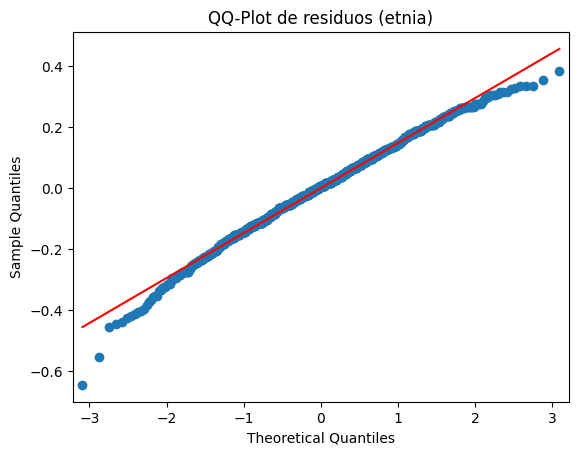

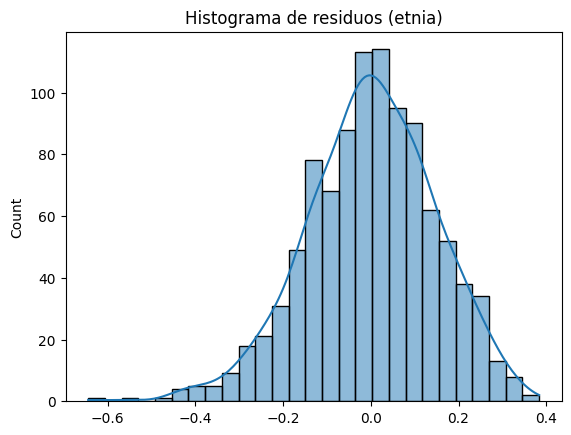


Test de Levene:
LeveneResult(statistic=np.float64(0.5902872187659914), pvalue=np.float64(0.6697370629203332))

Lambda óptimo Box–Cox: 1.2311103027331298


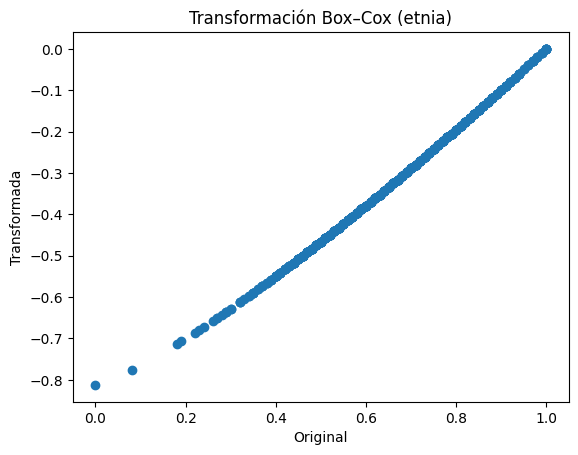


ANOVA con Box–Cox:
             sum_sq     df          F        PR(>F)
C(etnia)   1.057633    4.0  15.103996  5.410250e-12
Residual  17.418324  995.0        NaN           NaN

Shapiro-Wilk BC:
ShapiroResult(statistic=np.float64(0.9974978064712748), pvalue=np.float64(0.1292787948122805))


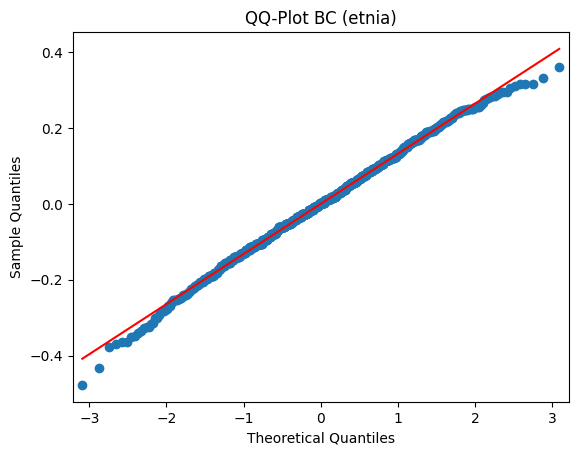

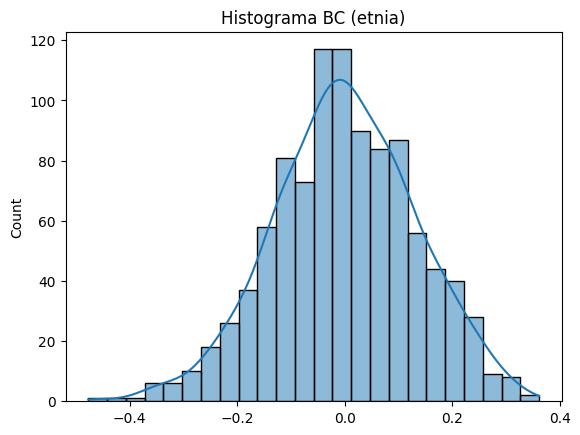


Levene BC:
LeveneResult(statistic=np.float64(0.7927723209368022), pvalue=np.float64(0.5299157128127033))

Tukey HSD:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_A group_B    0.017 0.8546 -0.0294 0.0635  False
group_A group_C   0.0257 0.4827 -0.0176 0.0691  False
group_A group_D   0.0514 0.0138   0.007 0.0957   True
group_A group_E   0.1115    0.0  0.0625 0.1606   True
group_B group_C   0.0087  0.952 -0.0244 0.0419  False
group_B group_D   0.0343 0.0512 -0.0001 0.0688  False
group_B group_E   0.0945    0.0  0.0542 0.1348   True
group_C group_D   0.0256 0.1387 -0.0045 0.0558  False
group_C group_E   0.0858    0.0  0.0491 0.1225   True
group_D group_E   0.0602 0.0001  0.0223  0.098   True
-----------------------------------------------------


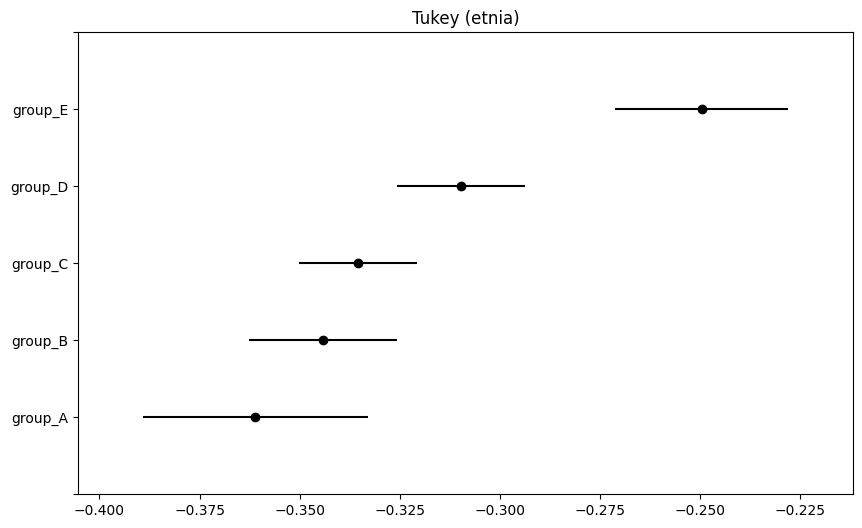


 ANÁLISIS PARA: nivel_educativo_de_los_padres


ANOVA:
                                     sum_sq     df         F    PR(>F)
C(nivel_educativo_de_los_padres)   0.729556    5.0  6.521583  0.000006
Residual                          22.239352  994.0       NaN       NaN

Prueba Shapiro-Wilk:
ShapiroResult(statistic=np.float64(0.9939131876364586), pvalue=np.float64(0.00043230680546277306))


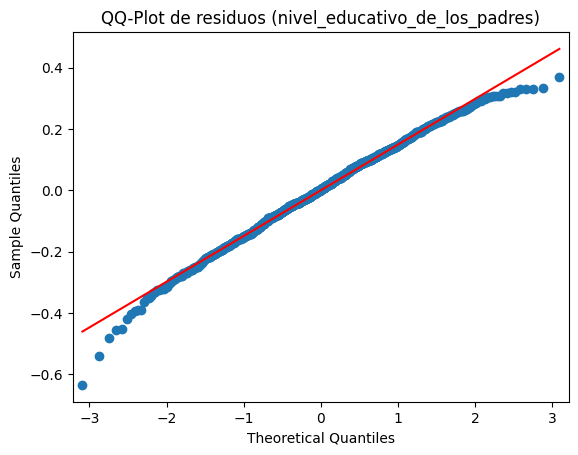

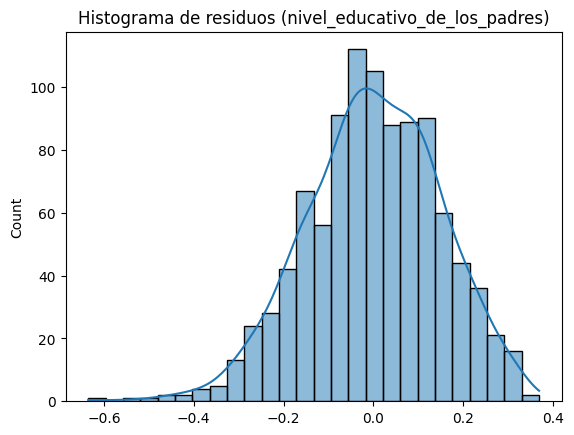


Test de Levene:
LeveneResult(statistic=np.float64(0.933346082636382), pvalue=np.float64(0.45839733913132197))

Lambda óptimo Box–Cox: 1.2311103027331298


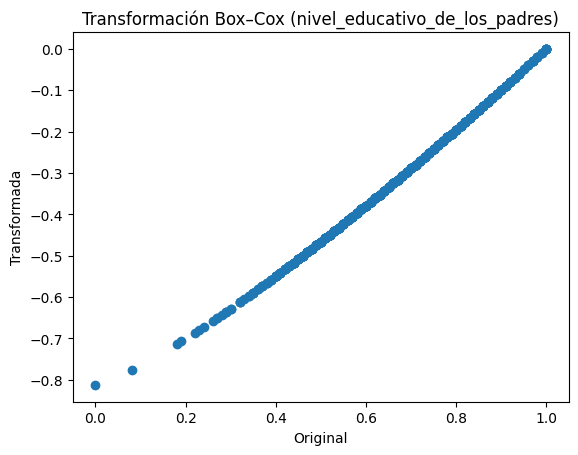


ANOVA con Box–Cox:
                                     sum_sq     df         F    PR(>F)
C(nivel_educativo_de_los_padres)   0.588762    5.0  6.543557  0.000005
Residual                          17.887196  994.0       NaN       NaN

Shapiro-Wilk BC:
ShapiroResult(statistic=np.float64(0.9975876654896578), pvalue=np.float64(0.14934717817782184))


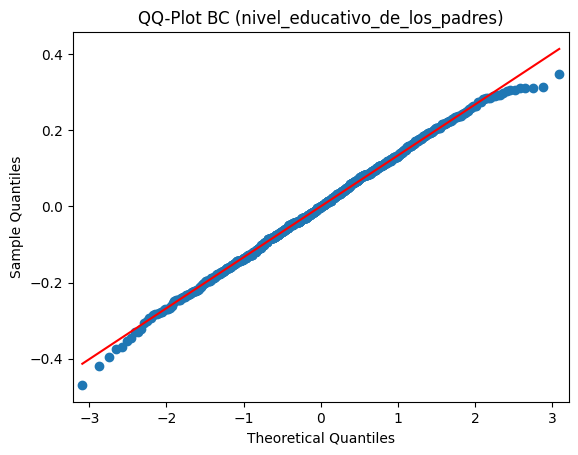

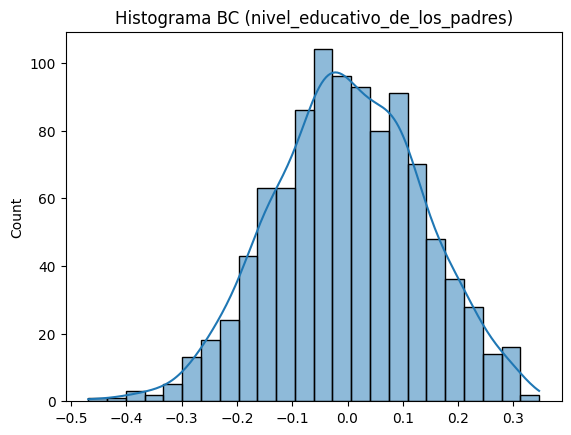


Levene BC:
LeveneResult(statistic=np.float64(1.151229372876216), pvalue=np.float64(0.3314965961548466))

Tukey HSD:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
algo_de_preparatoria algo_de_universidad   0.0317  0.171 -0.0066    0.07  False
algo_de_preparatoria        licenciatura   0.0526 0.0126  0.0071   0.098   True
algo_de_preparatoria            maestria   0.0559 0.0624 -0.0016  0.1134  False
algo_de_preparatoria        preparatoria   -0.013 0.9363 -0.0526  0.0266  False
algo_de_preparatoria    tecnico_asociado   0.0389 0.0462  0.0004  0.0773   True
 algo_de_universidad        licenciatura   0.0209 0.7457 -0.0226  0.0644  False
 algo_de_universidad            maestria   0.0242 0.8205 -0.0318  0.0802  False
 algo_de_universidad        preparatoria  -0.0447 0.0087 -0.0821 -0.0073   True
 al

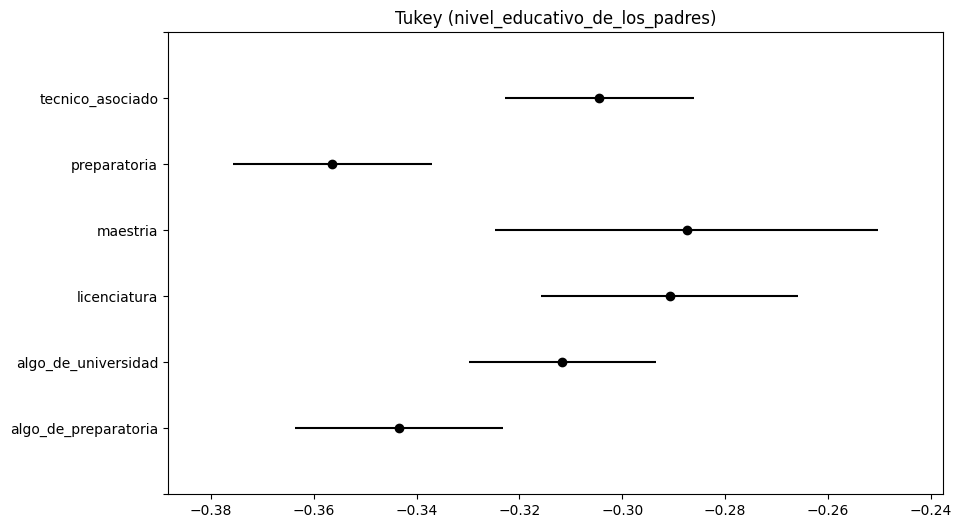


 ANÁLISIS PARA: tipo_de_comida


ANOVA:
                      sum_sq     df           F        PR(>F)
C(tipo_de_comida)   2.827804    1.0  140.118842  2.413196e-30
Residual           20.141104  998.0         NaN           NaN

Prueba Shapiro-Wilk:
ShapiroResult(statistic=np.float64(0.9954490621707266), pvalue=np.float64(0.004512376086928984))


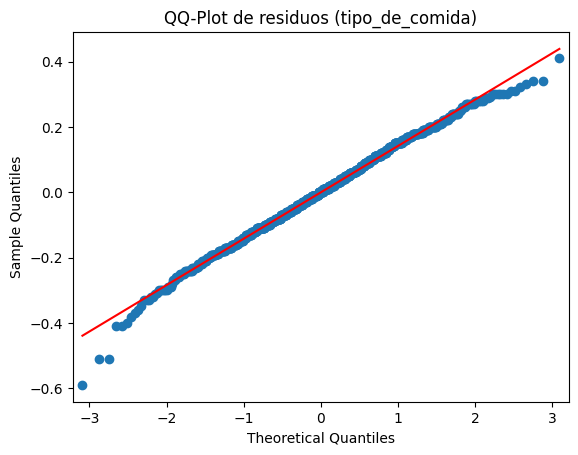

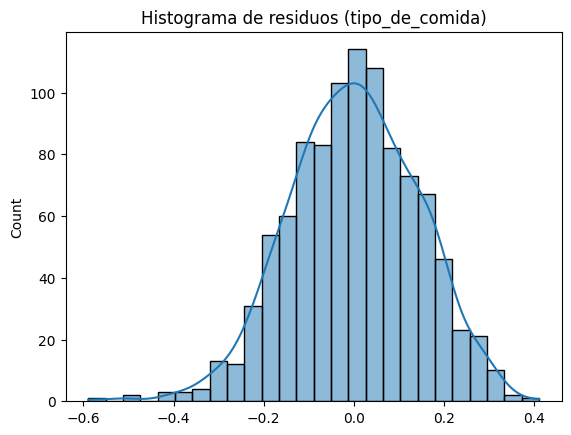


Test de Levene:
LeveneResult(statistic=np.float64(3.1937866572936344), pvalue=np.float64(0.07422200559323522))

Lambda óptimo Box–Cox: 1.2311103027331298


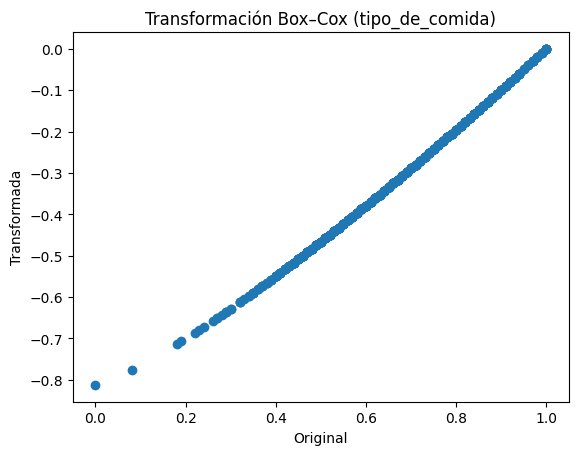


ANOVA con Box–Cox:
                      sum_sq     df           F        PR(>F)
C(tipo_de_comida)   2.246363    1.0  138.134719  5.799634e-30
Residual           16.229594  998.0         NaN           NaN

Shapiro-Wilk BC:
ShapiroResult(statistic=np.float64(0.9974209956828554), pvalue=np.float64(0.1141628464321891))


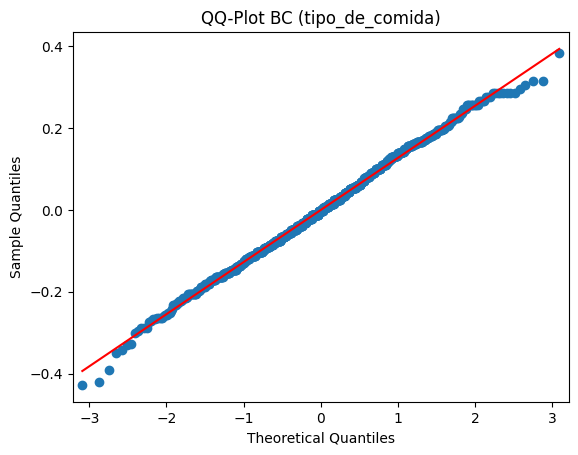

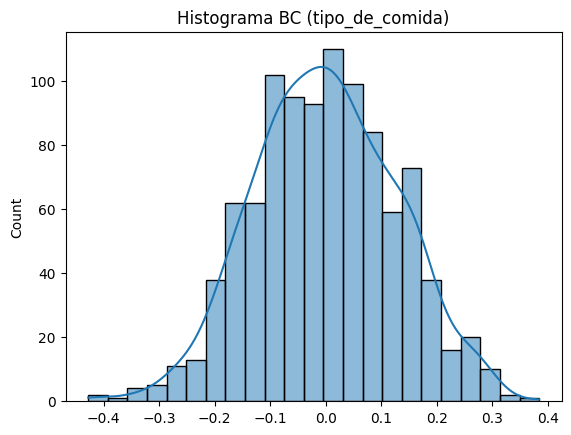


Levene BC:
LeveneResult(statistic=np.float64(0.7650088053453857), pvalue=np.float64(0.3819759929608444))

Tukey HSD:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
estandar subsidiado   -0.099   0.0 -0.1156 -0.0825   True
---------------------------------------------------------


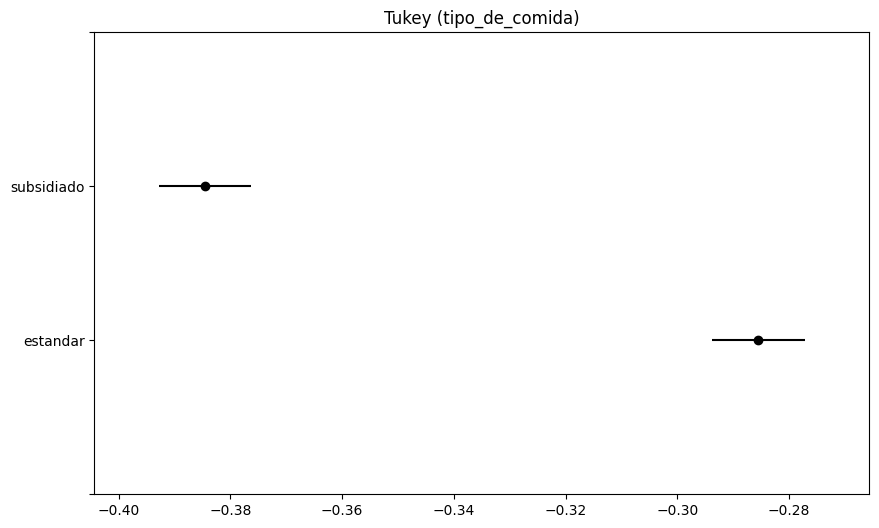


 ANÁLISIS PARA: curso_de_preparación_para_el_examen


ANOVA:
                                           sum_sq     df          F  \
C(curso_de_preparación_para_el_examen)   0.725316    1.0  32.542648   
Residual                                22.243592  998.0        NaN   

                                              PR(>F)  
C(curso_de_preparación_para_el_examen)  1.535913e-08  
Residual                                         NaN  

Prueba Shapiro-Wilk:
ShapiroResult(statistic=np.float64(0.9940042362310672), pvalue=np.float64(0.0004940158075297123))


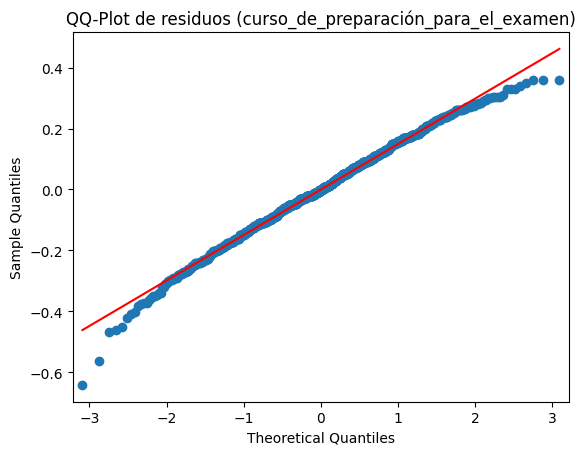

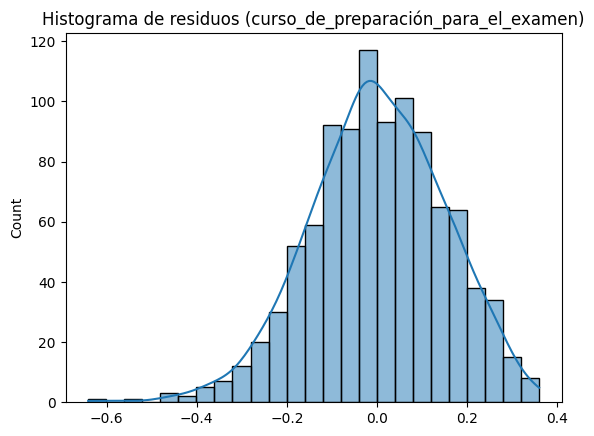


Test de Levene:
LeveneResult(statistic=np.float64(0.5330170705114413), pvalue=np.float64(0.4655125071689348))

Lambda óptimo Box–Cox: 1.2311103027331298


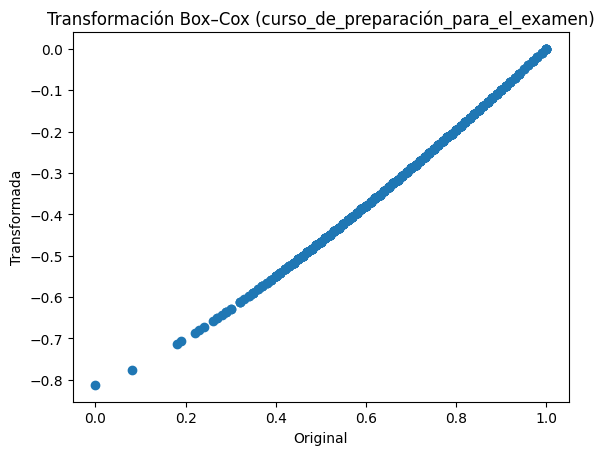


ANOVA con Box–Cox:
                                           sum_sq     df          F  \
C(curso_de_preparación_para_el_examen)   0.585788    1.0  32.678061   
Residual                                17.890170  998.0        NaN   

                                              PR(>F)  
C(curso_de_preparación_para_el_examen)  1.435713e-08  
Residual                                         NaN  

Shapiro-Wilk BC:
ShapiroResult(statistic=np.float64(0.9975273938563431), pvalue=np.float64(0.13558986717285165))


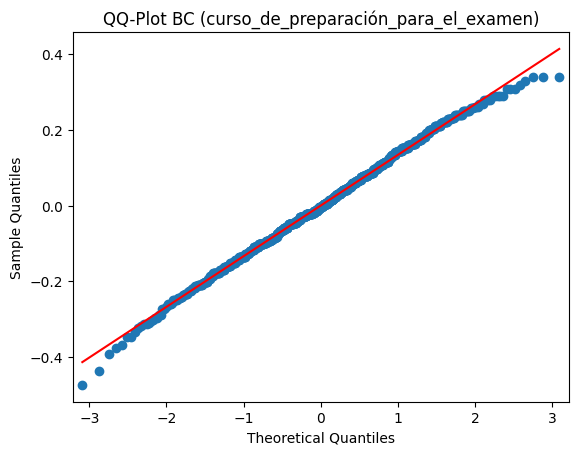

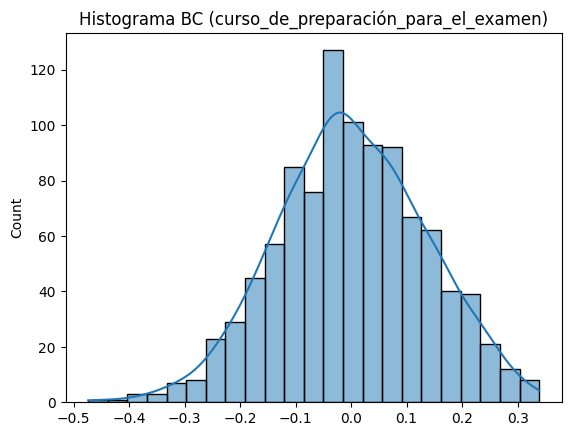


Levene BC:
LeveneResult(statistic=np.float64(0.08308712489258306), pvalue=np.float64(0.7732164746863852))

Tukey HSD:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
completado   nada  -0.0505   0.0 -0.0678 -0.0332   True
-------------------------------------------------------


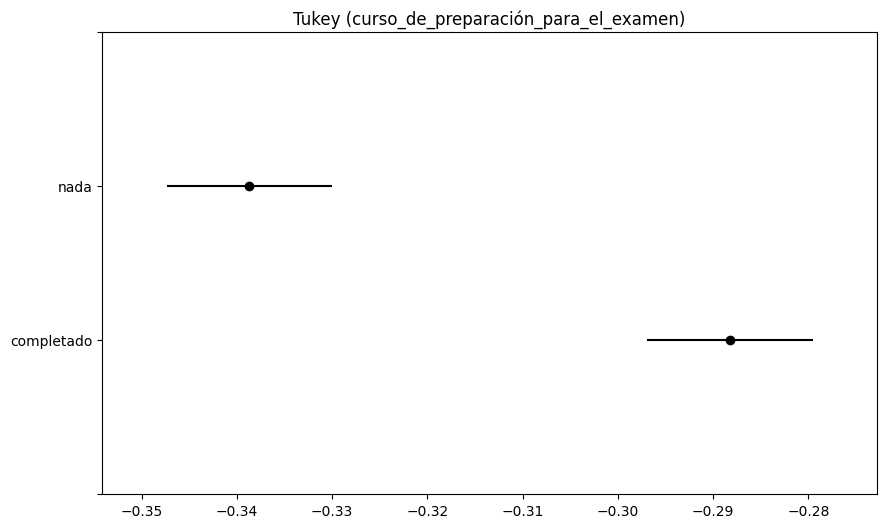


 ANÁLISIS PARA: sexo


ANOVA:
             sum_sq     df          F        PR(>F)
C(sexo)    0.648137    1.0  28.979336  9.120186e-08
Residual  22.320771  998.0        NaN           NaN

Prueba Shapiro-Wilk:
ShapiroResult(statistic=np.float64(0.9949566122679079), pvalue=np.float64(0.0020814018993309457))


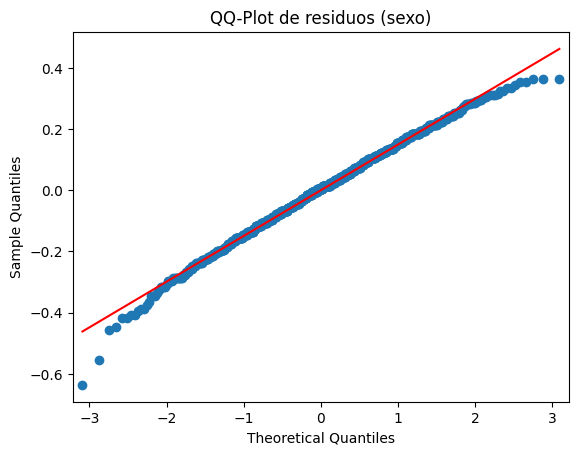

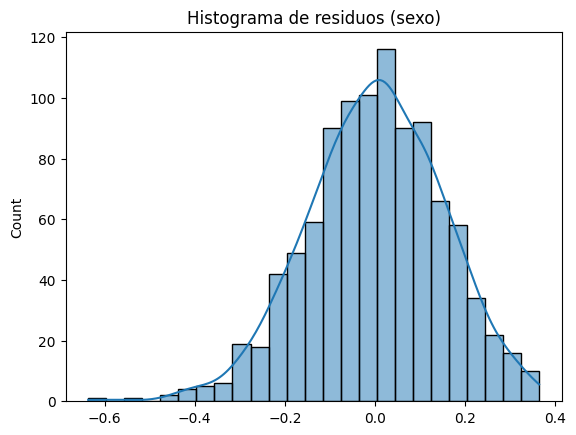


Test de Levene:
LeveneResult(statistic=np.float64(0.3463686359706985), pvalue=np.float64(0.55630915751998))

Lambda óptimo Box–Cox: 1.2311103027331298


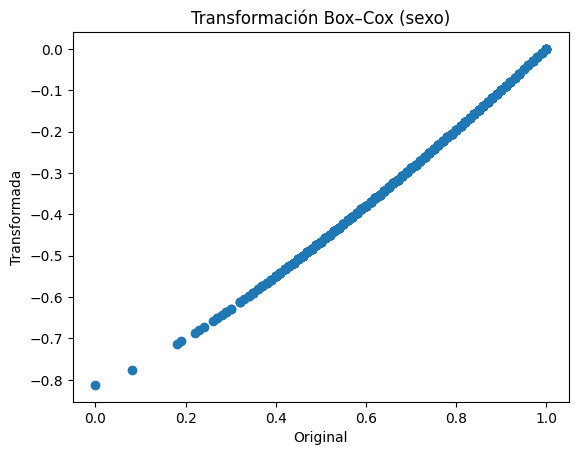


ANOVA con Box–Cox:
             sum_sq     df          F        PR(>F)
C(sexo)    0.514751    1.0  28.601705  1.102312e-07
Residual  17.961207  998.0        NaN           NaN

Shapiro-Wilk BC:
ShapiroResult(statistic=np.float64(0.9981895048886442), pvalue=np.float64(0.3712597604500834))


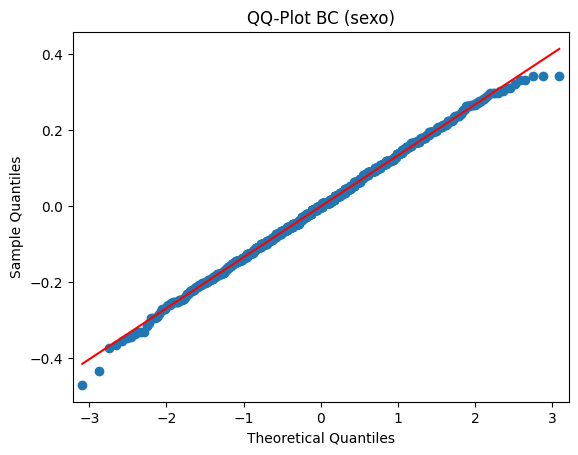

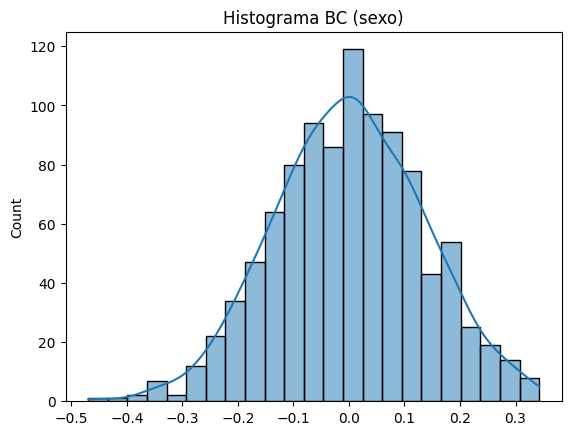


Levene BC:
LeveneResult(statistic=np.float64(0.021883709886256094), pvalue=np.float64(0.8824267600795117))

Tukey HSD:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
hombre  mujer  -0.0454   0.0 -0.0621 -0.0287   True
---------------------------------------------------


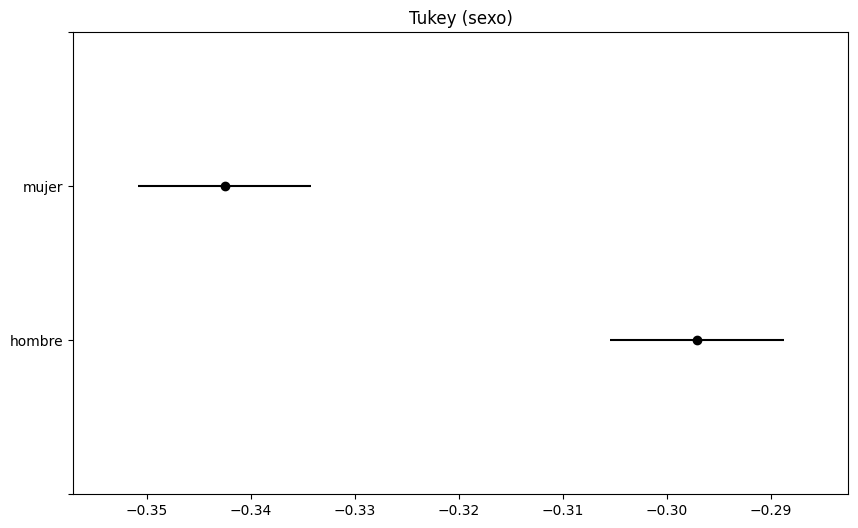

In [14]:
respuesta = "porcentaje_de_matematicas"

# Create a temporary DataFrame to apply transformations without altering the original 'df'
df_processed = df.copy()

# Check for non-positive values in the target column
if (df_processed[respuesta] <= 0).any():
    # If non-positive values exist, add a small constant to make them strictly positive.
    # This is necessary for the Box-Cox transformation.
    epsilon = 1e-6
    df_processed[respuesta] = df_processed[respuesta] + epsilon
    print(f"Warning: Non-positive values found in '{respuesta}'. Adding a small constant ({epsilon}) to shift data for Box-Cox transformation.")

analizar_categoria(df_processed, "etnia", respuesta)
analizar_categoria(df_processed, "nivel_educativo_de_los_padres", respuesta)
analizar_categoria(df_processed, "tipo_de_comida", respuesta)
analizar_categoria(df_processed, "curso_de_preparación_para_el_examen", respuesta)
analizar_categoria(df_processed, "sexo", respuesta)